In [35]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [46]:
import pandas as pd
import seaborn as sns
import pytz
from datetime import datetime
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [179]:
df.shape

(608, 31)

In [190]:
df = pd.read_csv('all_latest_affirmation_records_dynamodb.csv')
df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories
81,youtube#video,DLY4eHPLn9pwQAz2Gk-1shut77Y,8RYrYP8v2E8,2021-12-02T15:00:05Z,UCRuPauGGAAXM2Ls8Z3kMO-A,Talk To Me Nice Lyric video by Toni Jones (Aff...,The lyric video for Toni Jones newest single T...,https://i.ytimg.com/vi/8RYrYP8v2E8/hqdefault.jpg,480,360,Toni Jones,none,2021-12-02T15:00:05Z,8RYrYP8v2E8,PT4M6S,2d,hd,False,False,rectangular,processed,public,youtube,True,True,False,253189,7131.0,0,167.0,['https://en.wikipedia.org/wiki/Christian_musi...
513,youtube#video,Z0vStJexU5p6hi9e6t0-TTh71Bo,oXpZHpj1FPU,2020-05-06T18:55:20Z,UCpucwEw6ZNqXXi38HiY51Mw,8D Music Success Positive Affirmation 432Hz; R...,Listening in earphone is highly recommended as...,https://i.ytimg.com/vi/oXpZHpj1FPU/hqdefault.jpg,480,360,Musical Tranquillity,none,2020-05-06T18:55:20Z,oXpZHpj1FPU,PT17M51S,2d,hd,False,False,rectangular,processed,public,youtube,True,True,False,6025,97.0,0,1.0,['https://en.wikipedia.org/wiki/Electronic_mus...


In [191]:
dv = pd.read_csv('meditation_music_affirmations_dynamodb.csv')
dv.shape

(1299, 31)

In [196]:
# Merge the two dataframes based on the 'videoId' column
merged_df = pd.merge(dv, df, on='videoId', how='left', suffixes=('', '_y'), indicator=True)

# Filter out the rows present in both dataframes
dv_only = merged_df[merged_df['_merge'] == 'left_only']

# Drop the indicator column and any columns with suffix '_y'
columns_to_drop = [col for col in dv_only.columns if col.endswith('_y')]
dv_only = dv_only.drop(columns_to_drop, axis=1)
dv_only = dv_only.drop(['_merge'], axis=1)

# # Reset the index of the resulting dataframe
# dv_only.reset_index(drop=True, inplace=True)

dv = dv_only
dv.shape

(691, 31)

In [198]:
dv.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories
240,youtube#video,dTaOZAa5L23CnrxvFjl3jfzk7do,kC6so_Z5mGg,2016-02-16T21:21:47Z,UC6ashd-m9GHYP6wozPCoC8A,Powerful Abundance Meditation - Manifest Your ...,A powerful Law of Attraction meditation to hel...,https://i.ytimg.com/vi/kC6so_Z5mGg/hqdefault.jpg,480,360,Jessica Heslop - Manifest by Jess,none,2016-02-16T21:21:47Z,kC6so_Z5mGg,PT15M58S,2d,hd,False,True,rectangular,processed,public,youtube,True,True,False,3468461,46310.0,0,2055.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
475,youtube#video,rgxPKyBUqmrn2_C9gXy94p-ow-I,KSWMcaLPLj8,2016-11-16T09:36:05Z,UCexppetVFUFG2ur9eHN48Yg,Narayan Narayan Chanting Meditation Song [ Med...,Narayan Narayan Chanting Meditation Song -Prer...,https://i.ytimg.com/vi/KSWMcaLPLj8/hqdefault.jpg,480,360,Prernamurti Bharti Shriji,none,2016-11-16T09:36:05Z,KSWMcaLPLj8,PT6M8S,2d,hd,False,True,rectangular,processed,public,youtube,True,True,False,21857,504.0,0,24.0,"['https://en.wikipedia.org/wiki/Music', 'https..."


In [199]:
def calculate_published_age(df):
    df['publishTime'] = pd.to_datetime(df['publishTime']).dt.tz_convert('UTC')  # Convert publishTime to UTC timezone
    current_time = datetime.now(pytz.utc)  # Get current datetime in UTC
    df['PublishedAgeMin'] = (current_time - df['publishTime']).dt.total_seconds() / 60  # Calculate time difference in minutes
    df['PublishedAgeMin'] = df['PublishedAgeMin'].astype(int)  # Convert to integer to display actual minutes

# Call the function 
calculate_published_age(df)
calculate_published_age(dv)
df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories,PublishedAgeMin
586,youtube#video,a1mLIiz48W1SuVl3W23miTWSQ50,Zh9jc6XluKk,2022-07-20T15:00:20Z,UC-Q0VEt_ConjePtx96BlVPw,Hermetic Affirmations from The Emerald Tablet ...,The worthy find the way that leads to the moun...,https://i.ytimg.com/vi/Zh9jc6XluKk/hqdefault.jpg,480,360,AlphaAffirmations,none,2022-07-20 15:00:20+00:00,Zh9jc6XluKk,PT18M56S,2d,hd,True,True,rectangular,processed,public,youtube,True,True,False,25736,873.0,0,60.0,['https://en.wikipedia.org/wiki/Religion'],851972
354,youtube#video,UAPiEjdZs7iZw86_n1pYpTz2Ztc,Ivqymc7YZX8,2024-02-28T06:00:06Z,UCEGwhj3VQ4aDCKzQTThlIeA,Cancer ♋️ Affirmation + Not Their Business Feb...,I do Intuitive Mystic Tarot Readings\n\nMy Voi...,https://i.ytimg.com/vi/Ivqymc7YZX8/hqdefault.jpg,480,360,ForTheMoon OfCancer,none,2024-02-28 06:00:06+00:00,Ivqymc7YZX8,PT16M38S,2d,sd,False,False,rectangular,processed,public,youtube,True,True,False,11,4.0,0,1.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,5793


In [200]:
# Function to convert duration string to total number of seconds
def duration_to_seconds(duration):
    if 'H' in duration:
        hours = int(duration.split('H')[0][2:])
    else:
        hours = 0
    if 'M' in duration:
        minutes = int(duration.split('M')[0].split('T')[-1])
    else:
        minutes = 0
    if 'S' in duration:
        seconds = int(duration.split('S')[0].split('M')[-1])
    else:
        seconds = 0
    return hours * 3600 + minutes * 60 + seconds

# Apply the function to the duration column
df['durationSeconds'] = df['duration'].apply(duration_to_seconds)
dv['durationSeconds'] = dv['duration'].apply(duration_to_seconds)
df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories,PublishedAgeMin,durationSeconds
145,youtube#video,QPbFXrD923Q3Xii_KuK2z92uhO0,VeaL_besyq8,2013-09-24T01:06:42Z,UCqFzWxSCi39LnW1JKFR3efg,Daily Affirmation: Charles Barkley and Muggsy ...,Stuart Smalley (Al Franken) is joined by NBA p...,https://i.ytimg.com/vi/VeaL_besyq8/hqdefault.jpg,480,360,Saturday Night Live,none,2013-09-24 01:06:42+00:00,VeaL_besyq8,PT7M14S,2d,hd,False,True,rectangular,processed,public,youtube,True,True,False,190870,2325.0,0,154.0,['https://en.wikipedia.org/wiki/Entertainment'...,5491046,434
595,youtube#video,e_DG-OfTBtmqzts2d4INbqQYANo,Y-CZ4Q2X-w4,2024-02-28T23:00:30Z,UCUb7oTK6RTL1FLAPE1R7Bsg,ASMR Fluffy Mic Scratching &amp; Positive Affi...,hiii! welcome to my asmr channel! ⋆ ⋆ ⋆ ⋆ ⋆ ...,https://i.ytimg.com/vi/Y-CZ4Q2X-w4/hqdefault.jpg,480,360,Sizzle Asmr,none,2024-02-28 23:00:30+00:00,Y-CZ4Q2X-w4,PT12M1S,2d,hd,False,False,rectangular,processed,public,youtube,True,True,False,2118,145.0,0,5.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,4772,721


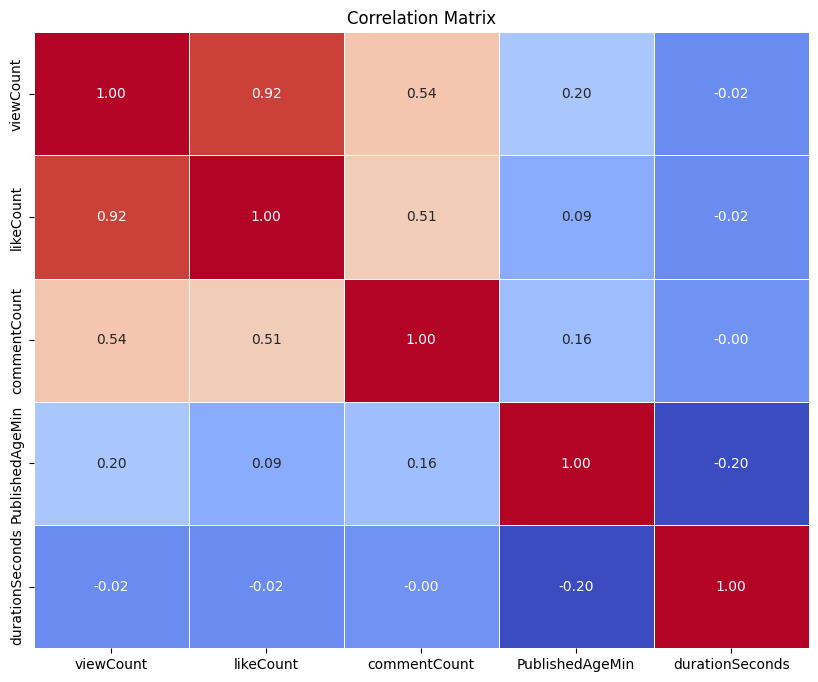

In [201]:
# Drop specific columns
columns_to_drop = ['width', 'height', 'favoriteCount']
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap without colorbar
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Matrix')
plt.show()

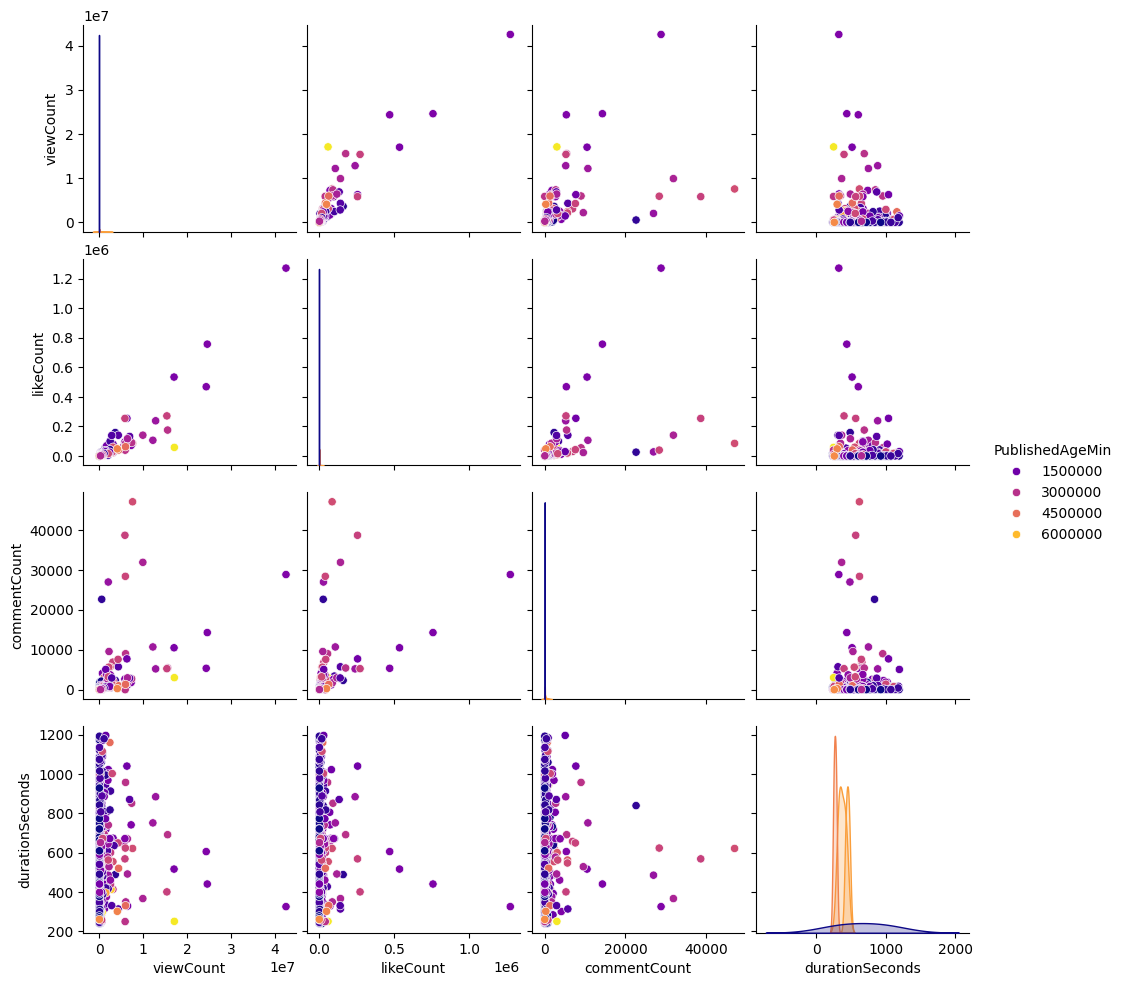

In [202]:
# Drop specific columns
columns_to_drop = ['width', 'height', 'favoriteCount']
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Choose a single column for coloring the plots
hue_column = 'PublishedAgeMin'  # Choose one of the numeric columns from numeric_df

# Create a pairplot with a different color for each plot based on the chosen column
sns.pairplot(numeric_df, hue=hue_column, palette='plasma')
plt.show()

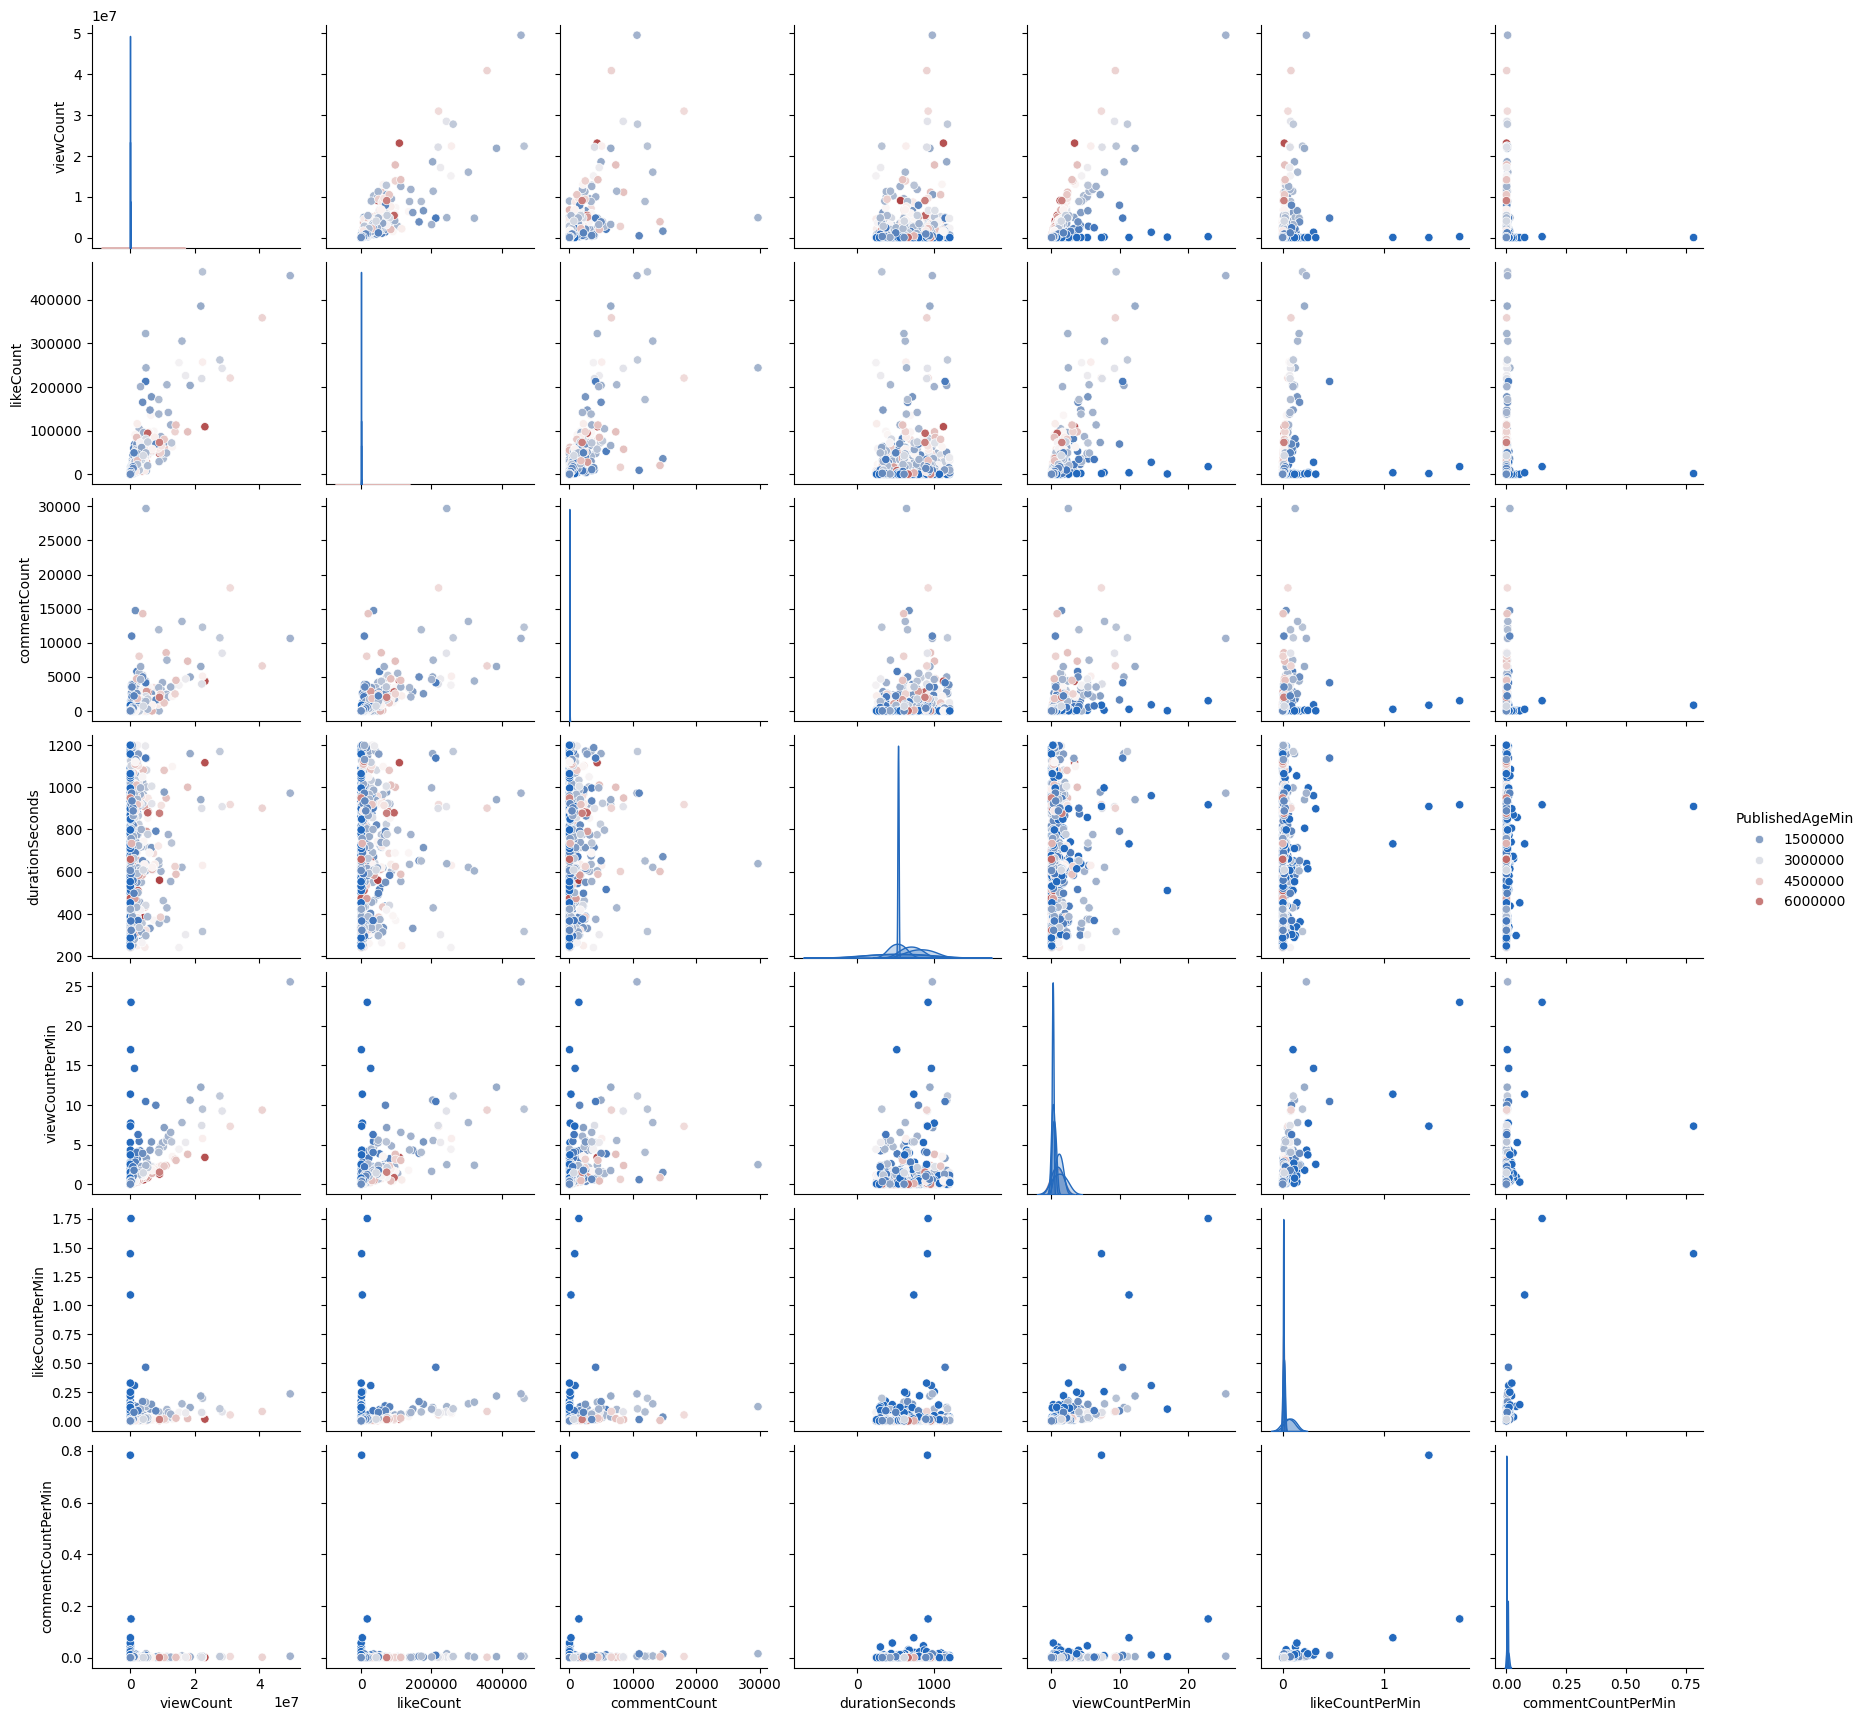

In [215]:
# Drop specific columns
columns_to_drop = ['width', 'height', 'favoriteCount']
numeric_dv = dv.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Choose a single column for coloring the plots
hue_column = 'PublishedAgeMin'  # Choose one of the numeric columns from numeric_df

# Create a pairplot with a different color for each plot based on the chosen column
sns.pairplot(numeric_dv, hue=hue_column, palette='vlag')
plt.show()

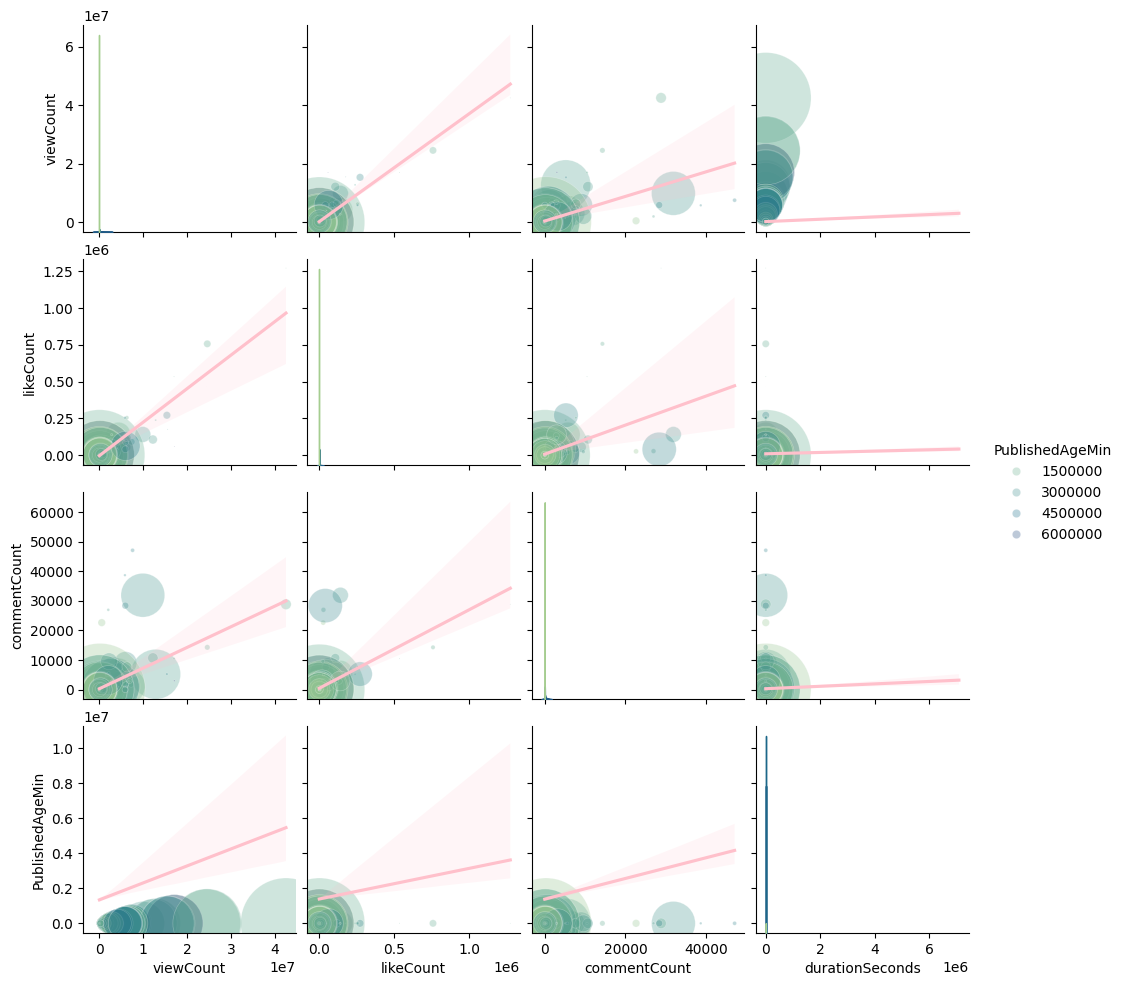

In [203]:
# Drop specific columns
columns_to_drop = ['width', 'height', 'favoriteCount']
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Add durationSeconds to numeric_df if it's not already included
if 'durationSeconds' not in numeric_df.columns:
    numeric_df['durationSeconds'] = df['durationSeconds']

# Choose a single column for coloring the plots
hue_column = 'PublishedAgeMin'  # Choose one of the numeric columns from numeric_df

# Create pairplot without regression lines
g = sns.pairplot(numeric_df, hue=hue_column, palette='crest',
                 diag_kind='kde', markers='o', plot_kws={'alpha': 0.3})

# Log normalize the size of scatter points based on viewCount and set opacity
for ax in g.axes.flatten():
    if ax is not None:
        if ax.collections:
            sizes = numeric_df['viewCount'] / 10000  # Log normalize the size
            ax.collections[0].set_sizes(sizes)
            ax.collections[0].set_alpha(0.3)

# Add durationSeconds as a plot on the y-axis for other attributes
for i, col_x in enumerate(numeric_df.columns):
    for j, col_y in enumerate(numeric_df.columns):
        try:
            if i < len(numeric_df.columns) and j < len(numeric_df.columns) and i != j:  # Ensure indices are within bounds and not equal
                sns.regplot(data=numeric_df, x=col_x, y=col_y, color='pink', scatter=False, ax=g.axes[j, i])
        except IndexError:
            pass

plt.show()

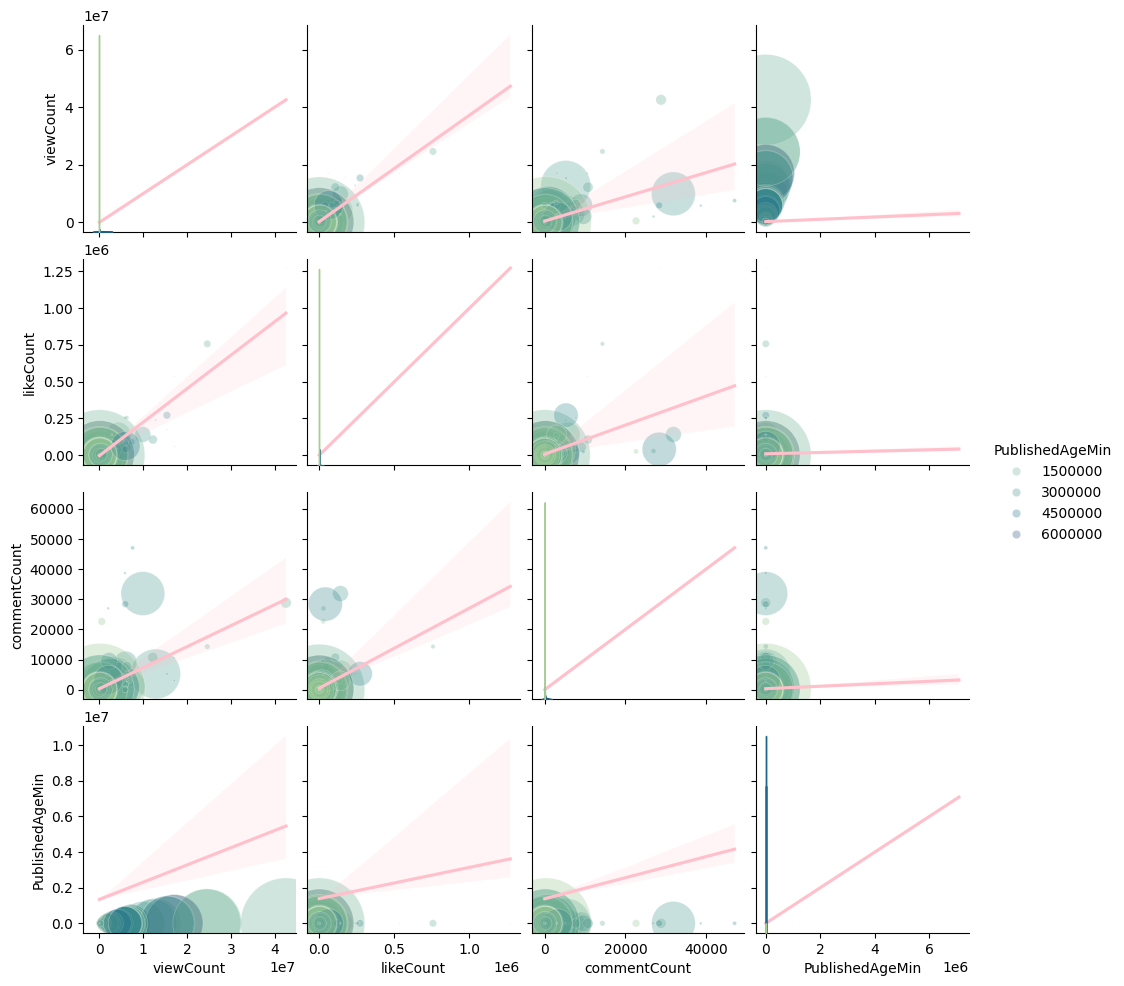

In [204]:
# Drop specific columns
columns_to_drop = ['width', 'height', 'favoriteCount']
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Add durationSeconds to numeric_df if it's not already included
if 'durationSeconds' not in numeric_df.columns:
    numeric_df['durationSeconds'] = df['durationSeconds']

# Choose a single column for coloring the plots
hue_column = 'PublishedAgeMin'  # Choose one of the numeric columns from numeric_df

# Create pairplot without regression lines
g = sns.pairplot(numeric_df, hue=hue_column, palette='crest',
                 diag_kind='kde', markers='o', plot_kws={'alpha': 0.3})

# Log normalize the size of scatter points based on viewCount and set opacity
for ax in g.axes.flatten():
    if ax is not None:
        if ax.collections:
            sizes = numeric_df['viewCount'] / 10000  # Log normalize the size
            ax.collections[0].set_sizes(sizes)
            ax.collections[0].set_alpha(0.3)

# Add durationSeconds as a plot on the y-axis for other attributes
for i, col_x in enumerate(numeric_df.columns):
    for j, col_y in enumerate(numeric_df.columns):
        if i < 4 and j < 4:
            sns.regplot(data=numeric_df, x=col_x, y=col_y, color='pink', scatter=False, ax=g.axes[j, i])

plt.show()

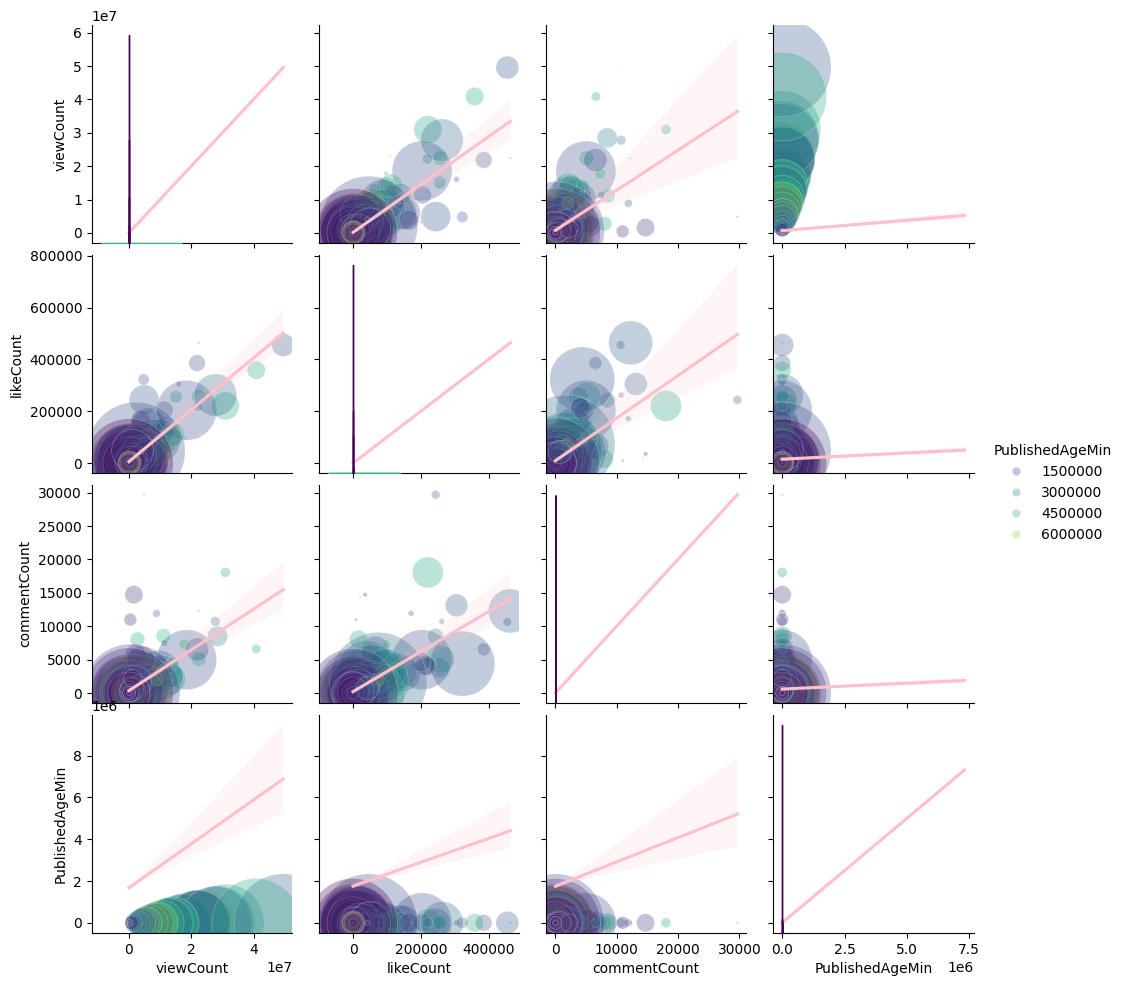

In [205]:
# Drop specific columns
columns_to_drop = ['width', 'height', 'favoriteCount']
numeric_dv = dv.select_dtypes(include=['float64', 'int64']).drop(columns=columns_to_drop)

# Add durationSeconds to numeric_df if it's not already included
if 'durationSeconds' not in numeric_dv.columns:
    numeric_dv['durationSeconds'] = dv['durationSeconds']

# Choose a single column for coloring the plots
hue_column = 'PublishedAgeMin'  # Choose one of the numeric columns from numeric_df

# Create pairplot without regression lines
g = sns.pairplot(numeric_dv, hue=hue_column, palette='viridis',
                 diag_kind='kde', markers='o', plot_kws={'alpha': 0.3})

# Log normalize the size of scatter points based on viewCount and set opacity
for ax in g.axes.flatten():
    if ax is not None:
        if ax.collections:
            sizes = numeric_dv['viewCount'] / 10000  # Log normalize the size
            ax.collections[0].set_sizes(sizes)
            ax.collections[0].set_alpha(0.3)

# Add durationSeconds as a plot on the y-axis for other attributes
for i, col_x in enumerate(numeric_dv.columns):
    for j, col_y in enumerate(numeric_dv.columns):
        if i < 4 and j < 4:
            sns.regplot(data=numeric_dv, x=col_x, y=col_y, color='pink', scatter=False, ax=g.axes[j, i])

plt.show()

In [206]:

df['viewCountPerMin'] = df['viewCount'] / df['PublishedAgeMin'].astype(float)
dv['viewCountPerMin'] = dv['viewCount'] / dv['PublishedAgeMin'].astype(float)

df['likeCountPerMin'] = df['likeCount'] / df['PublishedAgeMin'].astype(float)
dv['likeCountPerMin'] = dv['likeCount'] / dv['PublishedAgeMin'].astype(float)

df['commentCountPerMin'] = df['commentCount'] / df['PublishedAgeMin'].astype(float)
dv['commentCountPerMin'] = dv['commentCount'] / dv['PublishedAgeMin'].astype(float)

df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories,PublishedAgeMin,durationSeconds,viewCountPerMin,likeCountPerMin,commentCountPerMin
387,youtube#video,kPnKnJKNmud9DomZCgSXvZY4m-U,rcoXu3T96TE,2022-11-19T22:30:06Z,UC4PbNAfsPU5q4VPfWkVyGug,හැමදාම උදේට අහන්න මුලු දවසම සුභවාදීව ආරම්භ කරන...,ඔබේ ජීවිතය දනාත්මක ශක්තීන්ගෙන් පුරවගන්න ! #law...,https://i.ytimg.com/vi/rcoXu3T96TE/hqdefault.jpg,480,360,Universe In You,none,2022-11-19 22:30:06+00:00,rcoXu3T96TE,PT7M1S,2d,hd,False,True,rectangular,processed,public,youtube,True,True,False,1457344,24959.0,0,1085.0,['https://en.wikipedia.org/wiki/Religion'],675843,421,2.156335,0.036930,0.001605
315,youtube#video,v8l5Kz6aRgR7D4XkGFefj7m04vM,brptMVOpB3w,2024-02-25T19:37:43Z,UC2nyigZS5YNDrCu_pih809w,Sleepy Visual Triggers in the Rain 💤 ASMR 💤 Wh...,Welcome to ASMR visual triggers in the rain 💜 ...,https://i.ytimg.com/vi/brptMVOpB3w/hqdefault.jpg,480,360,WhispersRed ASMR,none,2024-02-25 19:37:43+00:00,brptMVOpB3w,PT19M34S,2d,hd,True,True,rectangular,processed,public,youtube,True,True,False,40654,1804.0,0,92.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,9295,1174,4.373749,0.194083,0.009898


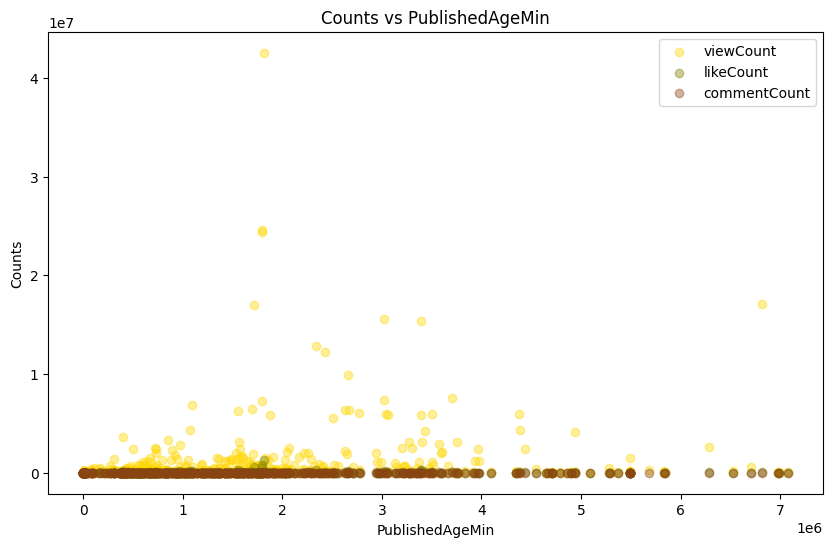

In [207]:
# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for col in ['viewCount', 'likeCount', 'commentCount']:
    plt.scatter(df['PublishedAgeMin'], df[col], color=colors[col], alpha=opacities[col], label=col)

# Add labels and title
plt.xlabel('PublishedAgeMin')
plt.ylabel('Counts')
plt.title('Counts vs PublishedAgeMin')
plt.legend()

# Display the plot
plt.show()

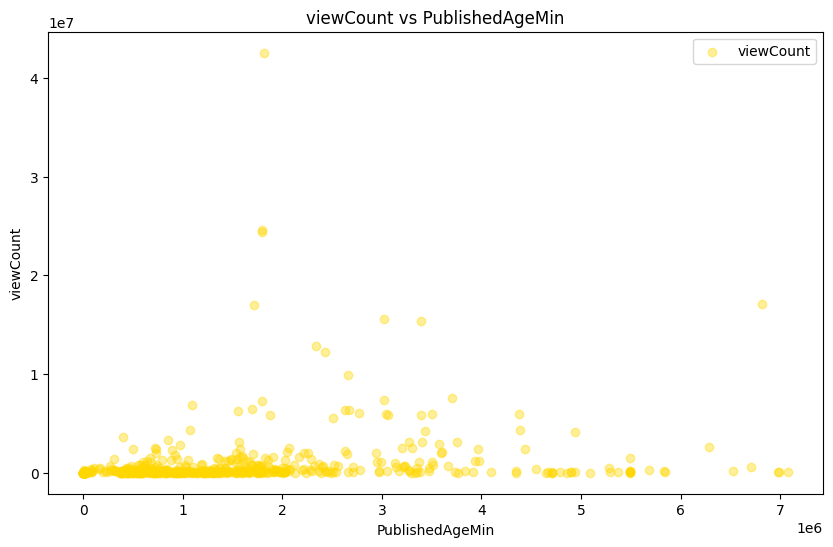

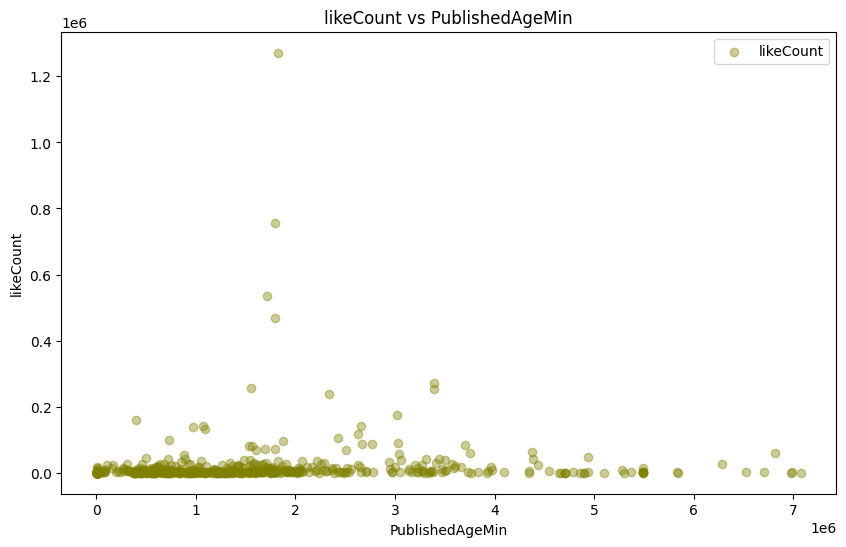

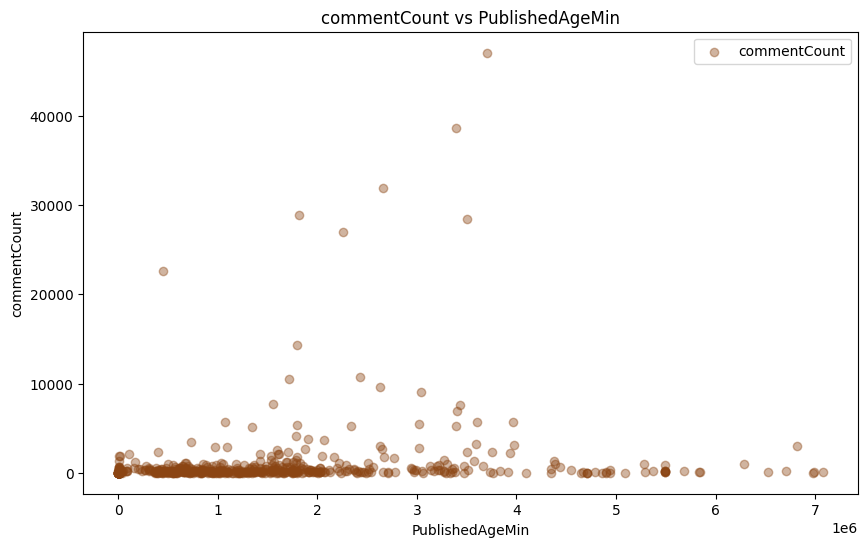

In [208]:
# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Generate separate scatter plots for each metric
for col in ['viewCount', 'likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PublishedAgeMin'], df[col], color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')
    plt.legend()
    plt.show()

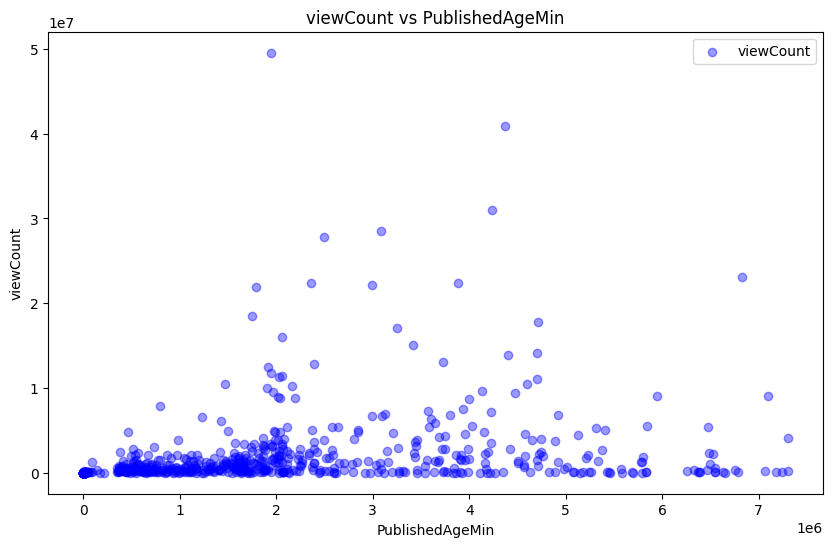

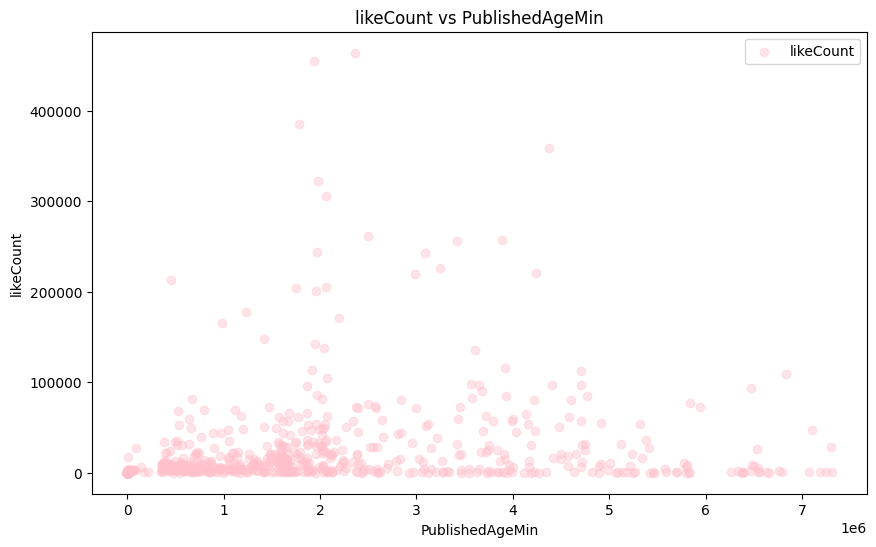

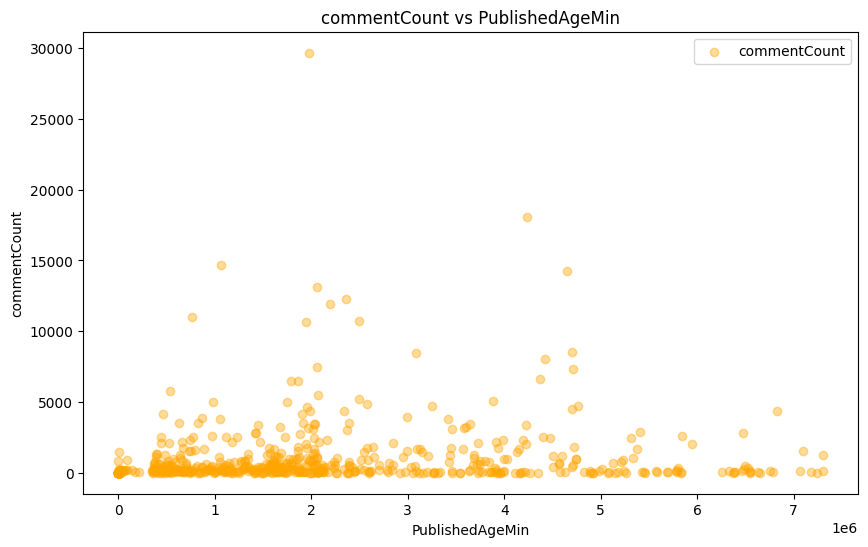

In [209]:
# Define colors and opacities
colors = {'viewCount': 'blue', 'likeCount': 'pink', 'commentCount': 'orange'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Generate separate scatter plots for each metric
for col in ['viewCount', 'likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    plt.scatter(dv['PublishedAgeMin'], dv[col], color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')
    plt.legend()
    plt.show()

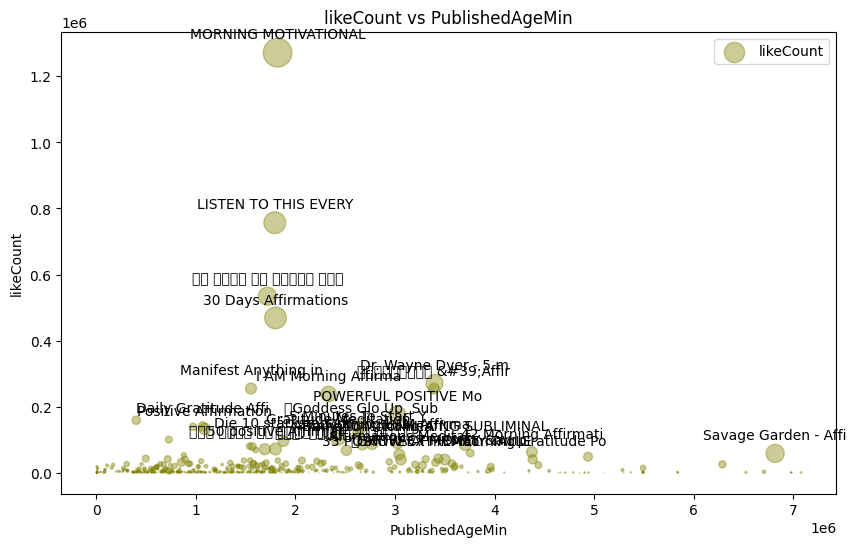

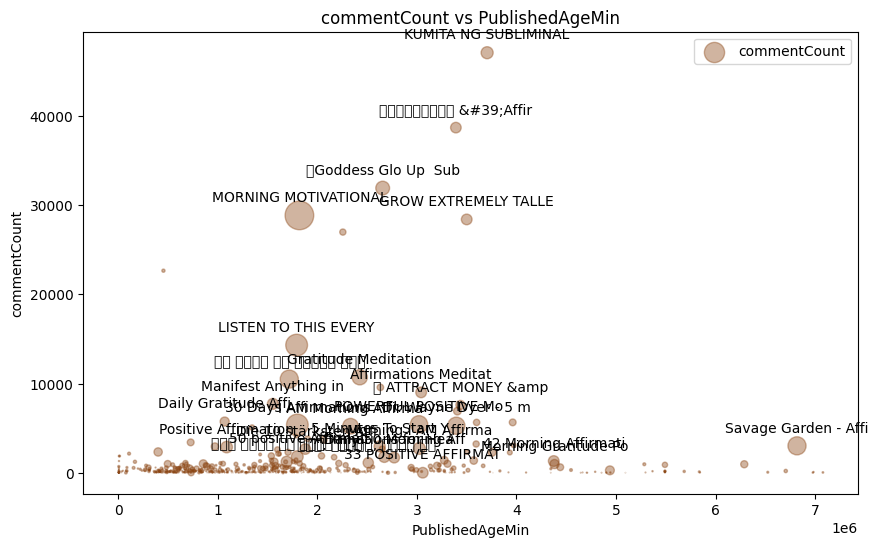

In [216]:

# Define colors and opacities
colors = {'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Generate separate scatter plots for likeCount and commentCount, varying size based on viewCount
for col in ['likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['PublishedAgeMin'], df[col], s=df['viewCount']/100000, color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')

    # Iterate through DataFrame rows for annotation
    for i, row in df.iterrows():
        if row['viewCount'] > view_count_threshold:
            plt.annotate(row['title'][:20], (row['PublishedAgeMin'], row[col]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.legend()
    plt.show()

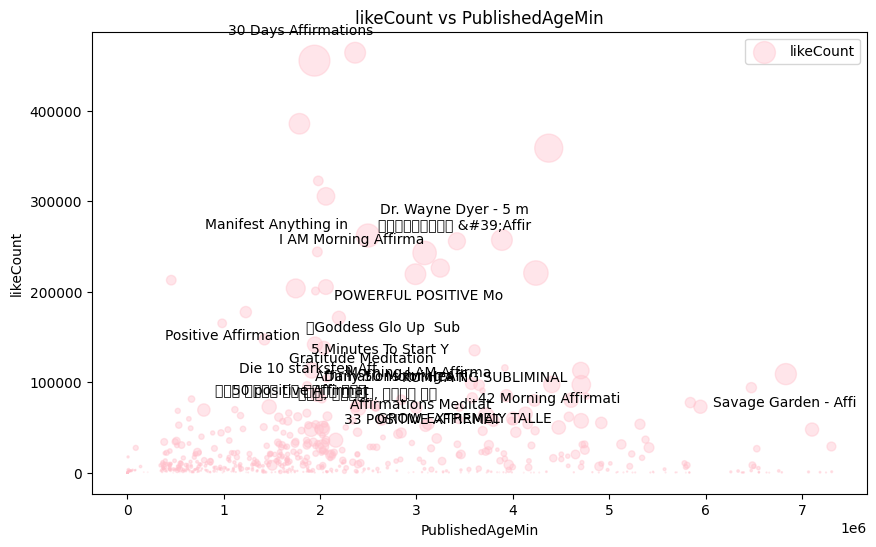

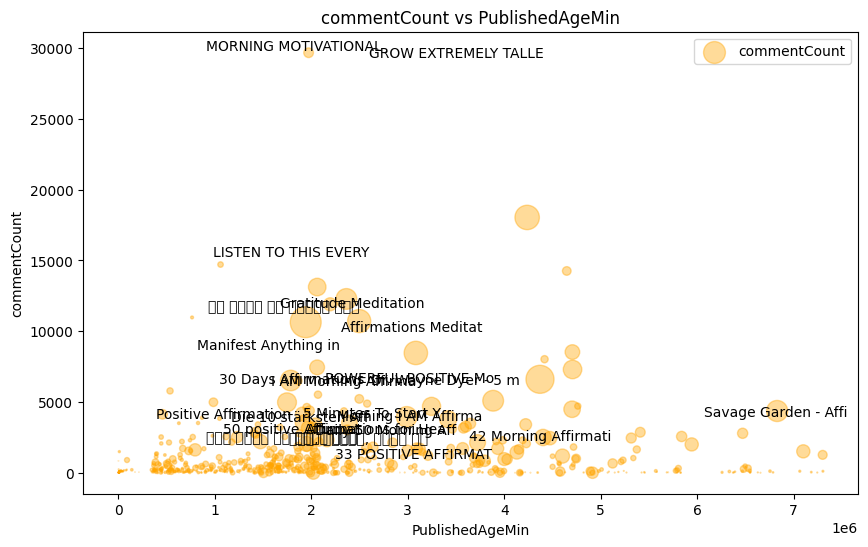

In [217]:

# Define colors and opacities
colors = {'likeCount': 'pink', 'commentCount': 'orange'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = dv['viewCount'].max() * 0.1

# Generate separate scatter plots for likeCount and commentCount, varying size based on viewCount
for col in ['likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(dv['PublishedAgeMin'], dv[col], s=dv['viewCount']/100000, color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')

    # Iterate through DataFrame rows for annotation
    for i, row in df.iterrows():
        if row['viewCount'] > view_count_threshold:
            plt.annotate(row['title'][:20], (row['PublishedAgeMin'], row[col]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.legend()
    plt.show()

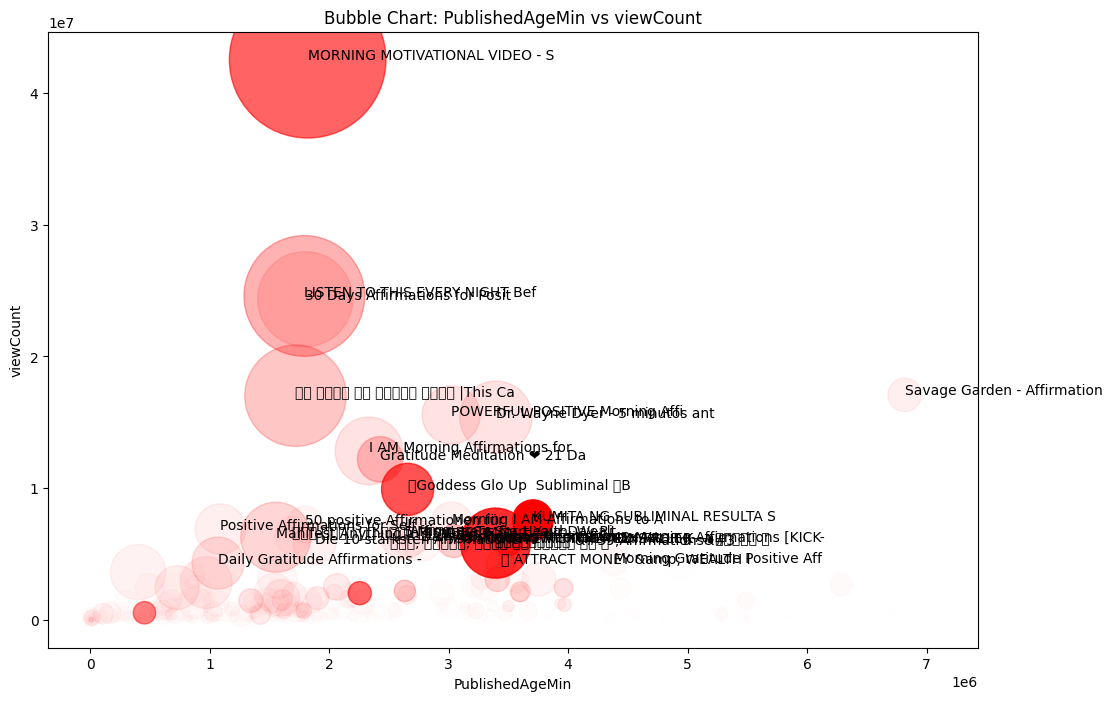

In [211]:
import matplotlib.pyplot as plt

# Fill NaN values in 'commentCount' column with 0
df['commentCount'].fillna(0, inplace=True)

# Define color and opacity
color = 'red'
opacity = df['commentCount'] / df['commentCount'].max()

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Create the bubble chart with reduced size and flipped axes
plt.figure(figsize=(12, 8))
bubble = plt.scatter(df['PublishedAgeMin'], df['viewCount'], s=df['likeCount']/100, c=color, alpha=opacity)
plt.ylabel('viewCount')
plt.xlabel('PublishedAgeMin')
plt.title('Bubble Chart: PublishedAgeMin vs viewCount')

# Annotate the plot with the first 80 characters of the "title" column for viewCounts above 40% of its maximum
for i, txt in enumerate(df['title']):
    if df['viewCount'].iloc[i] > view_count_threshold:
        plt.annotate(txt[:30], (df['PublishedAgeMin'].iloc[i], df['viewCount'].iloc[i]))

plt.show()


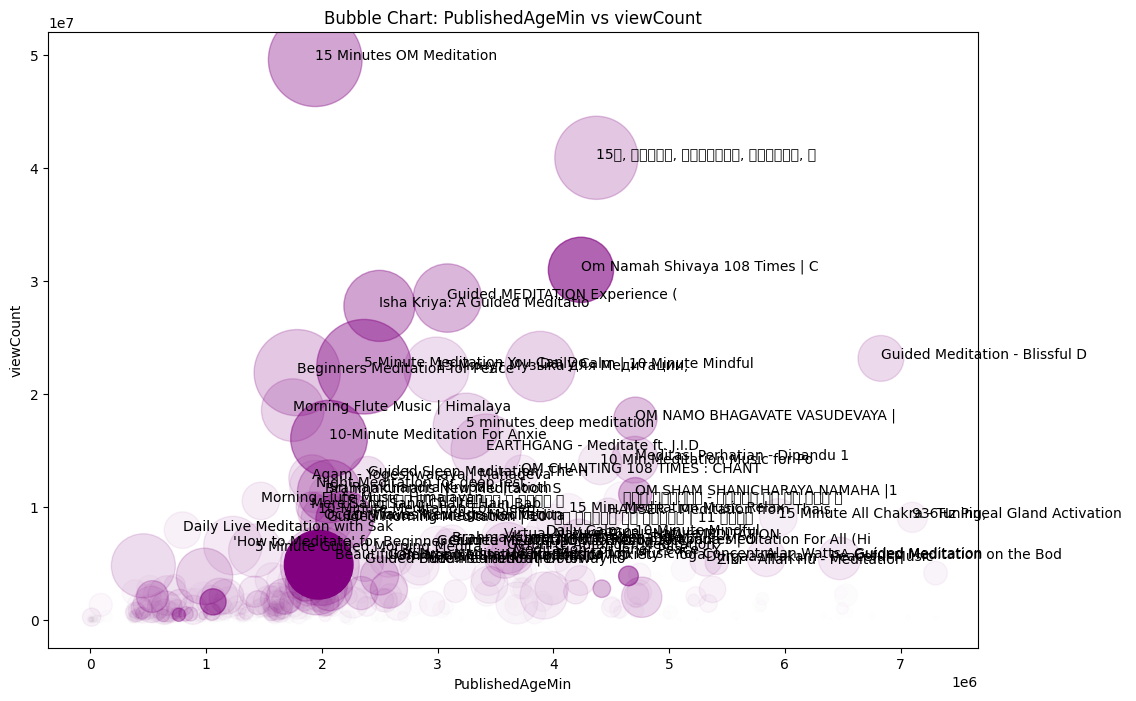

In [212]:
# Fill NaN values in 'commentCount' column with 0
dv['commentCount'].fillna(0, inplace=True)

# Define color and opacity
color = 'purple'
opacity = dv['commentCount'] / dv['commentCount'].max()

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = dv['viewCount'].max() * 0.1

# Create the bubble chart with reduced size and flipped axes
plt.figure(figsize=(12, 8))
bubble = plt.scatter(dv['PublishedAgeMin'], dv['viewCount'], s=dv['likeCount']/100, c=color, alpha=opacity)
plt.ylabel('viewCount')
plt.xlabel('PublishedAgeMin')
plt.title('Bubble Chart: PublishedAgeMin vs viewCount')

# Annotate the plot with the first 80 characters of the "title" column for viewCounts above 40% of its maximum
for i, txt in enumerate(dv['title']):
    if dv['viewCount'].iloc[i] > view_count_threshold:
        plt.annotate(txt[:30], (dv['PublishedAgeMin'].iloc[i], dv['viewCount'].iloc[i]))

plt.show()

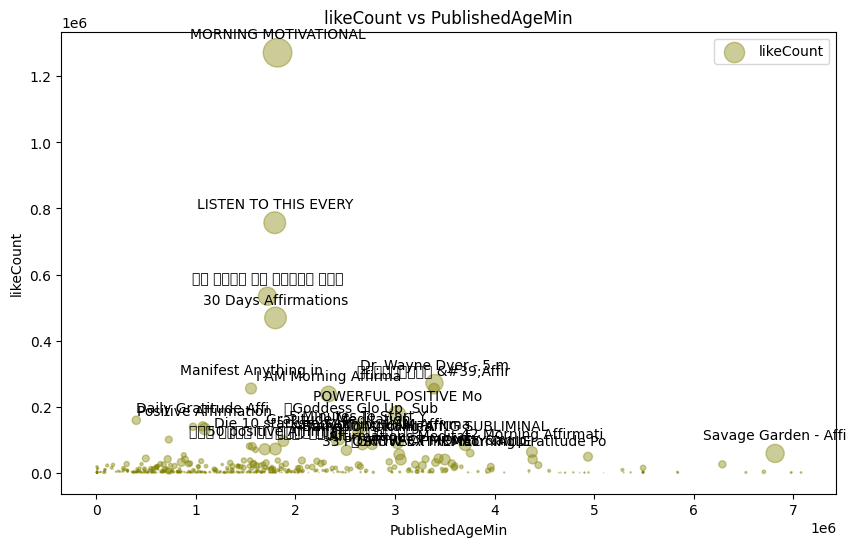

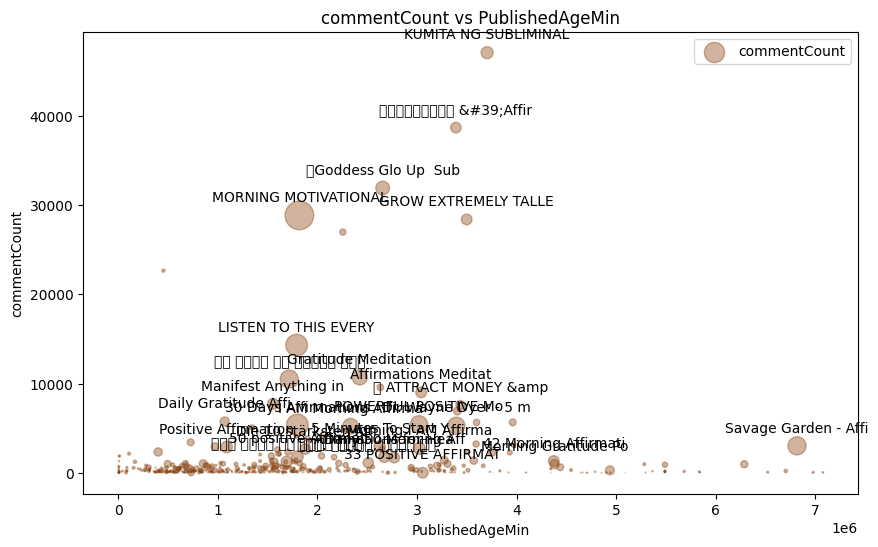

In [26]:

# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Generate separate scatter plots for likeCount and commentCount, varying size based on viewCount
for col in ['likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['PublishedAgeMin'], df[col], s=df['viewCount']/100000, color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')

    # Iterate through DataFrame rows for annotation
    for i, row in df.iterrows():
        if row['viewCount'] > view_count_threshold:
            plt.annotate(row['title'][:20], (row['PublishedAgeMin'], row[col]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.legend()
    plt.show()

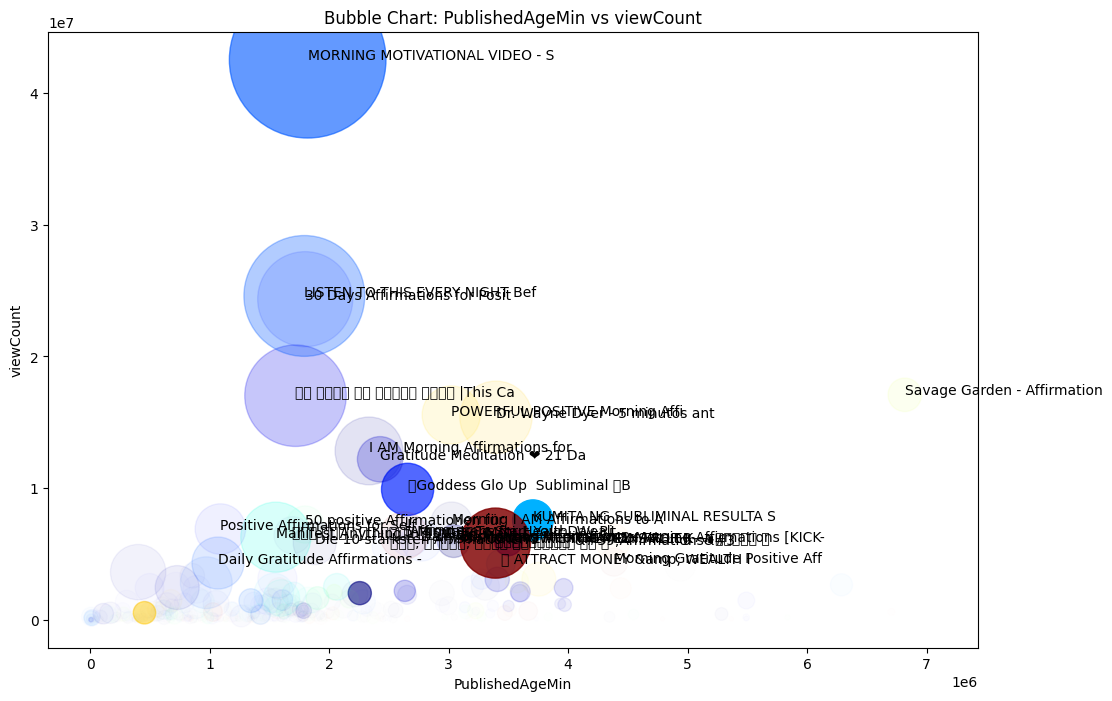

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Size based on viewCount, Opacity due to commentCount, position based on viewCount
# Assuming df is your DataFrame and it has 'channelId', 'PublishedAgeMin', 'viewCount', and 'likeCount' columns

# Fill NaN values in 'commentCount' column with 0
df['commentCount'].fillna(0, inplace=True)

# Define opacity based on commentCount
opacity = df['commentCount'] / df['commentCount'].max()

# Map each channelId to a unique color
unique_channels = df['channelId'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_channels)))
color_map = dict(zip(unique_channels, colors))

# Apply the color map to generate a color array for the scatter plot
scatter_colors = df['channelId'].map(color_map)

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Create the bubble chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(df['PublishedAgeMin'], df['viewCount'], s=df['likeCount']/100, c=scatter_colors, alpha=opacity)
plt.ylabel('viewCount')
plt.xlabel('PublishedAgeMin')
plt.title('Bubble Chart: PublishedAgeMin vs viewCount')

# Annotate the plot with the first 30 characters of the "title" column for viewCounts above 10% of its maximum
for i, txt in enumerate(df['title']):
    if df['viewCount'].iloc[i] > view_count_threshold:
        plt.annotate(txt[:30], (df['PublishedAgeMin'].iloc[i], df['viewCount'].iloc[i]))

plt.show()


In [28]:
# Perform groupby operation on 'channelTitle', aggregate using sum of 'viewCount', 'likeCount', 'commentCount'
# and count the number of 'channelId' occurrences. Calculate 'likeCount' as a percentage of 'viewCount'.
aggregated_df = df.groupby('channelTitle').agg({
    'viewCount': 'sum',
    'likeCount': 'sum',
    'commentCount': 'sum',
    'channelId': 'count'
}).rename(columns={'channelId': 'Number of Videos in this Category'})

# Calculate 'likeCount' as a percentage of 'viewCount'
aggregated_df['likePercentage'] = (aggregated_df['likeCount'] / aggregated_df['viewCount']) * 100
# Calculate 'likeCount' as a percentage of 'viewCount'
aggregated_df['commentPercentage'] = (aggregated_df['commentCount'] / aggregated_df['viewCount']) * 100

# Sort the aggregated dataframe in descending order by 'viewCount'
sorted_aggregated_df = aggregated_df.sort_values(by='viewCount', ascending=False)


sorted_aggregated_df.head(15)

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
Sandeep Maheshwari,74256247,2308162.0,51818.0,4,3.108374,0.069783
JeetFix,34773686,697426.0,9897.0,8,2.005614,0.028461
Bob Baker Affirmations,28837651,440923.0,41784.0,29,1.528984,0.144894
AKUO,23028805,189315.0,69675.0,10,0.822079,0.302556
GVG Motivation,22562750,314813.0,6527.0,8,1.395278,0.028928
Deepak Daiya,18719281,592403.0,12618.0,5,3.164667,0.067406
SavageGardenVEVO,17086513,58319.0,3015.0,1,0.341316,0.017645
Spiritual Mind,16123922,280270.0,5545.0,2,1.738225,0.034390
Jason Stephenson - Sleep Meditation Music,15552803,175629.0,5427.0,1,1.129243,0.034894


In [218]:
# Perform groupby operation on 'channelTitle', aggregate using sum of 'viewCount', 'likeCount', 'commentCount'
# and count the number of 'channelId' occurrences. Calculate 'likeCount' as a percentage of 'viewCount'.
aggregated_dv = dv.groupby('channelTitle').agg({
    'viewCount': 'sum',
    'likeCount': 'sum',
    'commentCount': 'sum',
    'channelId': 'count'
}).rename(columns={'channelId': 'Number of Videos in this Category'})

# Calculate 'likeCount' as a percentage of 'viewCount'
aggregated_dv['likePercentage'] = (aggregated_dv['likeCount'] / aggregated_dv['viewCount']) * 100
# Calculate 'likeCount' as a percentage of 'viewCount'
aggregated_dv['commentPercentage'] = (aggregated_dv['commentCount'] / aggregated_dv['viewCount']) * 100

# Sort the aggregated dataframe in descending order by 'viewCount'
sorted_aggregated_dv = aggregated_dv.sort_values(by='viewCount', ascending=False)

sorted_aggregated_dv.head(15)

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
Goodful,65353249,1215147.0,37497.0,10,1.859352,0.057376
Yellow Brick Cinema - Relaxing Music,63017552,577779.0,10546.0,2,0.916854,0.016735
The Honest Guys - Meditations - Relaxation,54755172,344575.0,15464.0,6,0.629301,0.028242
DailyDivine,49556272,455150.0,10636.0,1,0.918451,0.021462
Calm,39366621,448923.0,8456.0,7,1.140365,0.021480
Sadhguru,38953249,501146.0,13317.0,3,1.286532,0.034187
BKShivani,36434650,322039.0,11071.0,3,0.883881,0.030386
Boho Beautiful Yoga,34367099,564682.0,15463.0,19,1.643089,0.044994
Brahmakumaris Music Godlywood,34228571,145855.0,9603.0,6,0.426121,0.028056


In [221]:
# Sort the aggregated dataframe in descending order by 'viewCount'
aggregated_df.sort_values(by='Number of Videos in this Category', ascending=False)

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
Bob Baker Affirmations,28837651,440923.0,41784.0,29,1.528984,0.144894
Hermetic Truths,773258,12716.0,602.0,13,1.644471,0.077852
Jesus Affirmations,45159,10661.0,4520.0,11,23.607697,10.009079
Kiruthika Prabakaran,1547931,17241.0,2709.0,10,1.113809,0.175008
EpicRecap,11092119,89208.0,5192.0,10,0.804247,0.046808
...,...,...,...,...,...,...
Leadership Dynamics Inc,1680,46.0,4.0,1,2.738095,0.238095
Alexa Wyrwicz,4932,170.0,63.0,1,3.446878,1.277372
LUMINAVIBE,6,2.0,2.0,1,33.333333,33.333333


In [220]:
# Sort the aggregated dataframe in descending order by 'viewCount'
aggregated_dv.sort_values(by='Number of Videos in this Category', ascending=False)

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
Great Meditation,30334523,661032.0,19805.0,55,2.179141,0.065289
Boho Beautiful Yoga,34367099,564682.0,15463.0,19,1.643089,0.044994
MindfulPeace,10606701,158471.0,4197.0,11,1.494065,0.039569
Goodful,65353249,1215147.0,37497.0,10,1.859352,0.057376
My Peace Of Mindfulness,1921876,38440.0,672.0,8,2.000129,0.034966
...,...,...,...,...,...,...
Jessica Richburg,2057638,44038.0,475.0,1,2.140221,0.023085
Jerod Wessler,8,1.0,0.0,1,12.500000,0.000000
Jenn Im,119038,4886.0,195.0,1,4.104572,0.163813


In [223]:
aggregated_dv.sort_values(by='viewCount', ascending=False).tail(15)

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
Bishop Dr. Joshua Lwere,38,3.0,1.0,1,7.894737,2.631579
Relaxing Time Meditation,36,3.0,0.0,1,8.333333,0.000000
Prana Rising,36,1.0,1.0,1,2.777778,2.777778
365 Days of Meditation,22,5.0,2.0,1,22.727273,9.090909
Downtown,18,1.0,0.0,1,5.555556,0.000000
Meditation Third Eye,13,0.0,1.0,1,0.000000,7.692308
Jerod Wessler,8,1.0,0.0,1,12.500000,0.000000
JourneyZenithMeditate,8,1.0,0.0,1,12.500000,0.000000
IA Meditation music,6,1.0,0.0,1,16.666667,0.000000


In [29]:
sorted_aggregated_df.tail(15)

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
The Motivation Radio,10,1.0,0.0,1,10.000000,0.000000
Inner Peace,10,0.0,0.0,1,0.000000,0.000000
@Rich To Success,8,0.0,0.0,1,0.000000,0.000000
The Gate of happiness,7,4.0,0.0,1,57.142857,0.000000
J's Soul Food Hub,7,1.0,0.0,1,14.285714,0.000000
Masashiku channel,6,1.0,0.0,1,16.666667,0.000000
LUMINAVIBE,6,2.0,2.0,1,33.333333,33.333333
PKG ka Gyan,5,1.0,0.0,1,20.000000,0.000000
Paul's Daily Affirmations,3,1.0,0.0,1,33.333333,0.000000


In [30]:
(aggregated_df['Number of Videos in this Category'] == 1).sum()

272

In [31]:
# Filter channels with only 1 video
single_video_channels_df = aggregated_df[aggregated_df['Number of Videos in this Category'] == 1]

# Sort the single video channels DataFrame by 'viewCount' in descending order
single_video_channels_df = single_video_channels_df.sort_values('viewCount', ascending=False)
single_video_channels_df.head()

,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
SavageGardenVEVO,17086513,58319.0,3015.0,1,0.341316,0.017645
Jason Stephenson - Sleep Meditation Music,15552803,175629.0,5427.0,1,1.129243,0.034894
elixir subliminals,9903717,140972.0,31905.0,1,1.423425,0.322152
Mady Morrison,7232020,71701.0,1796.0,1,0.991438,0.024834
BKShivani,6397936,116982.0,2963.0,1,1.828433,0.046312


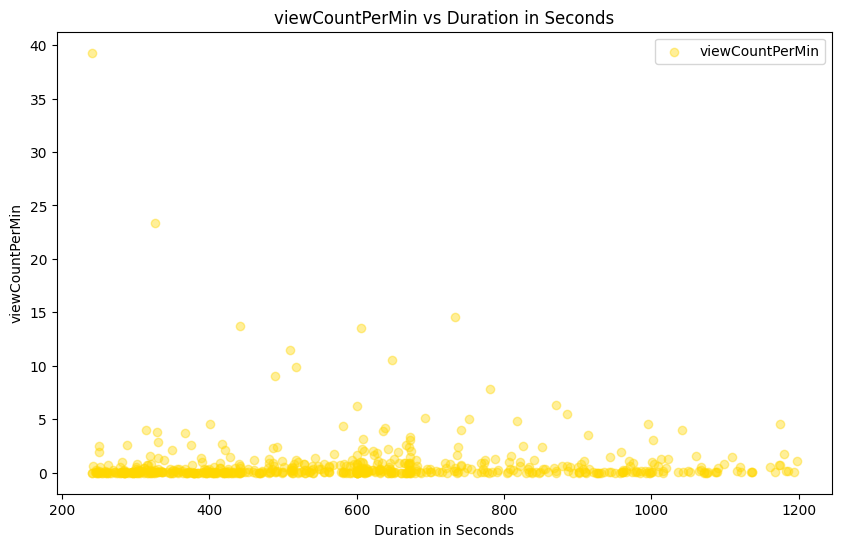

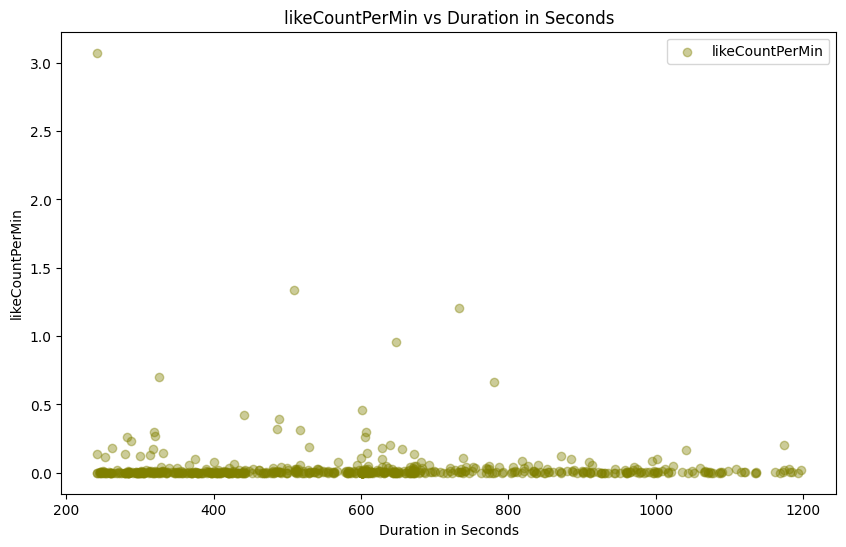

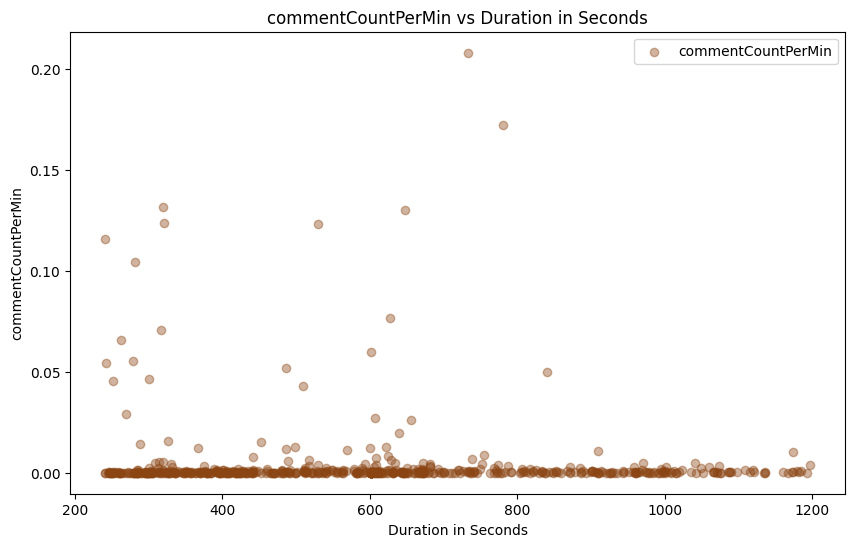

In [33]:
import matplotlib.pyplot as plt

# Define colors and opacities
colors = {'viewCountPerMin': 'gold', 'likeCountPerMin': 'olive', 'commentCountPerMin': 'saddlebrown'}
opacities = {'viewCountPerMin': 0.4, 'likeCountPerMin': 0.4, 'commentCountPerMin': 0.4}

# Generate separate scatter plots for each metric
for col in ['viewCountPerMin', 'likeCountPerMin', 'commentCountPerMin']:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['durationSeconds'], df[col], color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('Duration in Seconds')
    plt.ylabel(col)
    plt.title(f'{col} vs Duration in Seconds')
    plt.legend()
    plt.show()


In [ ]:
# largest number of videos

aggregated_sorted_num_vid = aggregated_df.sort_values(by='Number of Videos in this Category', ascending=False)
aggregated_sorted_num_vid.head()